<a href="https://colab.research.google.com/github/KenJiangg/Exploring-Datasets/blob/master/GooglePlayML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Google Play NLP Experiment
I am following the method from the CSE 199 Course I am taking ( <a href= "https://mybinder.org/v2/gh/kennyjoseph/cse199.git/master?filepath=activity.ipynb"> Example of NLP Logistic Regression </a>) 

#Data Science/ Data Wrangling Part
First, I need to preprocess my data into something I can work with for logistic regression. (<a href="https://github.com/zackchase/mxnet-the-straight-dope/blob/master/chapter02_supervised-learning/logistic-regression-gluon.ipynb"> Fundamentals of Logistic Regression </a>) In this case, I want to classify whether a review is Positive or Negative using the given translated_reviews column. 

Loading in Google Play Dataset

In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


importing data wrangling libraries 

In [0]:
import pandas as pd
import numpy as np

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings from pandas
import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')

read in the data into a dataframe 

In [0]:
app_play = pd.read_csv('drive/My Drive/Kaggle/Google Play Dataset/googleplaystore_user_reviews.csv')

seeing our initial dataframe and the  shape, we have 64295 entries of reviews 

In [4]:
app_play.head()
app_play.shape

(64295, 5)

create a dataframe of only positive reviews 

In [5]:
positive_reviews = app_play[app_play['Sentiment'] == 'Positive']
positive_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000


create a dataframe of only negative reviews 

In [6]:
negative_reviews = app_play[app_play['Sentiment'] == 'Negative']
negative_reviews.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
32,10 Best Foods for You,No recipe book Unable recipe book.,Negative,-0.500,0.500
43,10 Best Foods for You,Waste time It needs internet time n ask calls ...,Negative,-0.200,0.000
68,10 Best Foods for You,Faltu plz waste ur time,Negative,-0.200,0.000
85,10 Best Foods for You,Crap Doesn't work,Negative,-0.800,0.800
95,10 Best Foods for You,Boring. I thought actually just texts that's i...,Negative,-0.325,0.475


merging the two dataframes consisting of only positive and negative reviews in the dataframe 

In [7]:
merged = pd.merge(positive_reviews,negative_reviews, how = 'outer')
merged.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
2,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
4,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000


dropping columns I am not interested in 

In [8]:
merged = merged.drop(['Sentiment_Polarity','Sentiment_Subjectivity','App'], axis = 1)
merged.head()

,Translated_Review,Sentiment
0,I like eat delicious food. That's I'm cooking ...,Positive
1,I like eat delicious food. That's I'm cooking ...,Positive
2,This help eating healthy exercise regular basis,Positive
3,This help eating healthy exercise regular basis,Positive
4,Works great especially going grocery store,Positive


After data wrangling, we go from 64295 entries with 5 different columns of values to 32269 entries with 2 different columns of values because we are only interested in the words and if the sentiment is positive or negative 

In [9]:
merged.shape

(32269, 2)

#ML Part 
After getting the dataset I need for a logistic regression, I am now importing libraries for machine learning 

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report,roc_auc_score
import numpy as np


turning words into vectors (bag of words model)

In [0]:
count_vect = CountVectorizer(stop_words='english', min_df =.001)
X_counts = count_vect.fit_transform(merged['Translated_Review'].tolist())

model creation + classification report of our model

In [12]:
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(X_counts)
y = np.array([1 if row['Sentiment'] == 'Positive' else 0 for index, row in merged.iterrows()])

skf = StratifiedKFold(n_splits=3)
fold = 0

test_res = []
model_pred_test = []
for train_index, test_index in skf.split(X, y):
    fold +=1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
  
    model = LogisticRegressionCV()
    fitted = model.fit(X_train, y_train)
    test_res += list(y_test)
    model_pred_test +=  list(model.predict(X_test))

print(classification_report(test_res, model_pred_test, target_names=['Negative','Positive']))

             precision    recall  f1-score   support

   Negative       0.86      0.74      0.80      8271
   Positive       0.91      0.96      0.94     23998

avg / total       0.90      0.90      0.90     32269



classification report of a randomly generating model

In [13]:
print(classification_report(y_test,  
                            np.random.choice([0, 1], 
                                             size=(len(y_test),), 
                                             p=[y.sum()/len(y), 1-(y.sum()/len(y))]), 
                            target_names=['Negative','Positive']))

             precision    recall  f1-score   support

   Negative       0.26      0.74      0.38      2757
   Positive       0.75      0.27      0.39      7999

avg / total       0.62      0.39      0.39     10756



words that predict positive/ negative sentiments

In [14]:
model = LogisticRegressionCV()
fitted = model.fit(X, y)
coefficient_data = pd.DataFrame(list(zip(list(count_vect.vocabulary_.keys()),model.coef_[0,:])), 
                        columns=['word','coef'])

top_positive = coefficient_data.sort_values("coef",ascending=False)[:50].word
top_negative = coefficient_data.sort_values("coef",ascending=True)[:50].word

print("""Top 50 words predicting positive sentiment:\n\n{}

Top 50 words predicting negative sentiment: \n\n{}
""".format(", ".join(top_positive), ", ".join(top_negative)))


Top 50 words predicting positive sentiment:

tough, efficient, seen, worth, smoothly, mind, available, occasionally, know, manage, fish, let, color, signed, gameplay, scores, fixed, gear, ago, giving, reasons, machine, english, constantly, years, exactly, waited, tech, unusable, area, smart, matching, features, shows, flights, tracker, memory, wait, created, stops, note, mean, finally, bloody, annoyed, navigation, price, unfair, application, monitor

Top 50 words predicting negative sentiment: 

lost, currency, candy, internal, current, absolute, advance, ios, paid, somebody, macro, storage, sense, morning, opportunity, provide, lists, explain, offer, hotel, calculator, increased, chance, inside, saving, sign, board, compatible, completed, end, resources, playback, complicated, tinder, known, rank, action, messaging, episodes, latest, speak, hints, endless, continue, bars, difficulty, vehicles, loaded, animations, possibly



Trying to plot an rocc curve for the logistic regression model. Example Code I followed: <a href="https://chrisalbon.com/machine_learning/model_evaluation/plot_the_receiving_operating_characteristic_curve/"> Plotting ROC Curve </a> 

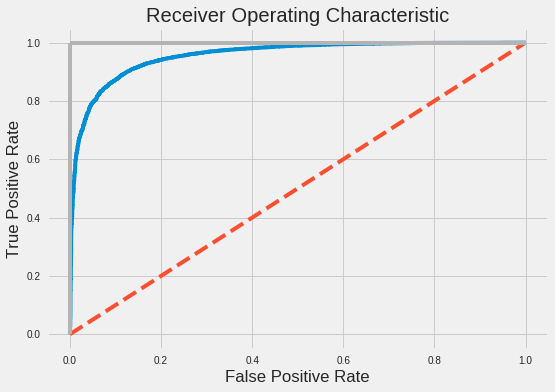

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(X_counts)
y = np.array([1 if row['Sentiment'] == 'Positive' else 0 for index, row in merged.iterrows()])

skf = StratifiedKFold(n_splits=3)
fold = 0

test_res = []
y_score = []
for train_index, test_index in skf.split(X, y):
    fold +=1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
  
    model = LogisticRegressionCV()
    fitted = model.fit(X_train, y_train)
    test_res += list(y_test)
    y_score +=  list(model.predict_proba(X_test)[:,1])
    
false_positive_rate, true_positive_rate, threshold = roc_curve(test_res, y_score)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [19]:
print(roc_auc_score(test_res,y_score))

0.955614991552766
